#         BANK CHURN PROBLEM

**Members**: Mateo Pérez, Iñigo Peña, Gotzon Viteri, Josu Viteri

# Dataset Description

**URL**: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data

The bank customer churn dataset is a CSV file which contains information about a study related to customer churn in a banking institution. The information is divided into 18 different variables, organized in 18 columns, being the first one the number of rows.

The attributes analyzed by this study is splitted into the different columns, which are:


### QUANTITATIVE VARIABLES: 
- Customer identification: a unique id for each customer. 

- Age: Customer’s age. 

- Credit Score: A value between 300 and 850 which expresses the level of probability of a customer to pay off the debt to the bank.

- Tenure: Number of years a customer has been a client of the bank. 

- Account Balance: Customer account balance. 

- Estimated yearly salary: An estimation of the customers salary.


### QUALITATIVE VARIABLES: 
- Surname: Surname of the customer. 

- Geography: Country where the customer lives. 

### BOOLEAN VARIABLES (1 for Yes, 0 for No): 
- HasCrCard: If customer has or not a Credit Card. 

- IsActiveMember: If the customer is an active member or not. 

- Exited: If the customer has exited the bank. Gender: If the customer is male or female.

### PROBLEM DESCRIPTION:
The primary task that we are going to be intending to solve is to apply what we are going to be learning during the course such as: machine learning techniques, training processes,etc. In order to build and train a model capable of learning and predicting when a customer is more likely to exit the banking platform.

# Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Step 1: Data understanding
- Dataframe shape
- Data types
- Description

In [2]:
df = pd.read_csv(r'src\rawDataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape

(10000, 18)

In this data we have 10.000 rows and 18 columns (features)

In [4]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

The dataset consists of numerical and categorical data types. Numerical columns include integers (int64) like RowNumber, CreditScore, Age, and floats (float64) like Balance and EstimatedSalary. Categorical columns are represented as object types, such as Surname, Geography, Gender, and Card Type. 

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


This table summarizes the dataset's key statistics. All columns have 10,000 values, meaning there is no missing data. The CreditScore averages around 650, with a range from 350 to 850, while the Age has a mean of 39, spanning 18 to 92. The Balance varies significantly, averaging ~76,485 but ranging from 0 to ~250,898. Features like HasCrCard and IsActiveMember are binary, showing proportions of about 70.55% and 51.51% respectively for a value of 1. Satisfaction scores average at 3, with most customers having between 1 and 4 products. Percentiles reveal that 25% of customers are aged 32 or younger, and the median balance is ~97,198. 

### Step2: Data Preparation

- Dropping irrelevant columns and rows

In [6]:
df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


'Row number', 'Surname' and 'CustomerId' columns seem to act as identifiers. They don't have much analytical value since they are unique or nearly unique, so we get rid of them.

In [7]:
df.shape

(10000, 15)

we've reduced the number of features from 18 to 15, as ther was irrelevant data for modeling

### Step 3: Feature Understanding
- Plotting Feature Distributions
- Histogram
- Boxplot
- KDE

Exited Clients:  2038
Non-Exited Clients:  7962


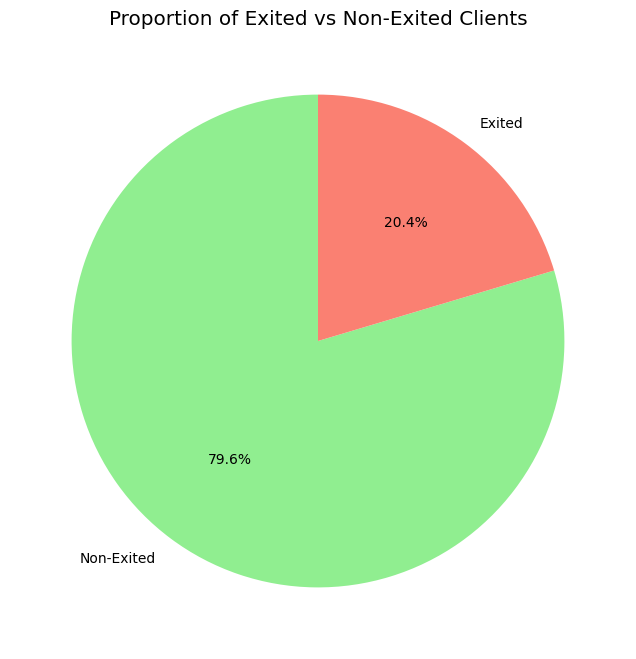

In [8]:
churn_counts = df['Exited'].value_counts()
print("Exited Clients: ", churn_counts[1])
print("Non-Exited Clients: ", churn_counts[0])

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Non-Exited', 'Exited'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Proportion of Exited vs Non-Exited Clients')
plt.show()

This chart shows the distribution of churned vs non-churned clients. We can see that our dataset is completed by 2038 clients who churned and 7962 who not (20.4% - 79.6%), this indicates a moderate imbalance between the classes. This imbalance can affect model's performance and lead to poor recall for the minority class or misleading performance metrics. To adress this imbalance we could undersample non-exited clients, adjust class weights or use metrics suitable for imbalanced data.

Text(0, 0.5, 'Count')

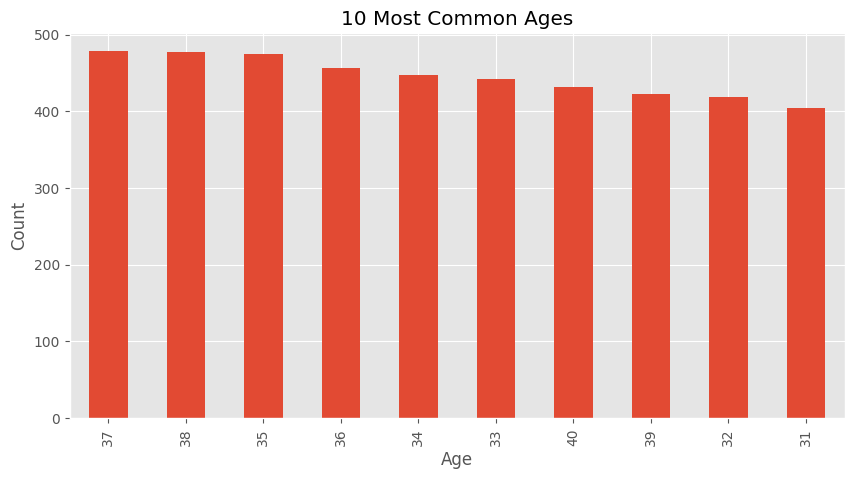

In [9]:
ax = df['Age'].value_counts() \
    .head(10) \
    .plot(kind='bar', figsize=(10,5), title='10 Most Common Ages')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

In this plot we can see how the most common clients over our dataset are middle aged clients, in between the range of 30 to 40 years old.

Text(0, 0.5, 'Count')

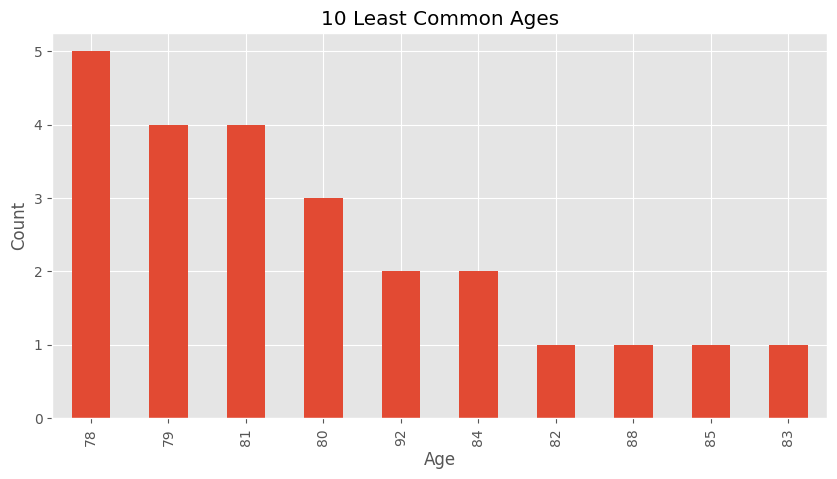

In [10]:
ax = df['Age'].value_counts() \
    .tail(10) \
    .plot(kind='bar', figsize=(10,5), title='10 Least Common Ages')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

On the other side, the 10 least common ages in the dataset predominantly belong to elderly clients, with ages around 75 years old and older. We can see that there are very few customers in this age group, which will might be treated as outliers later.

Text(0, 0.5, 'Count')

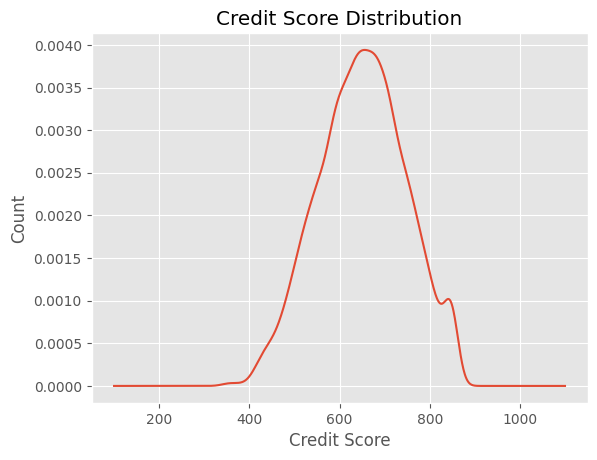

In [11]:
ax = df['CreditScore'].plot(kind='kde',
                              title='Credit Score Distribution',)

ax.set_xlabel('Credit Score')
ax.set_ylabel('Count')

The credit score distribution shows a peak around 700, indicating most customers have a high credit rating. Scores range from 400 to 900, covering a wide spectrum of creditworthiness.

Gender
Male      5457
Female    4543
Name: count, dtype: int64


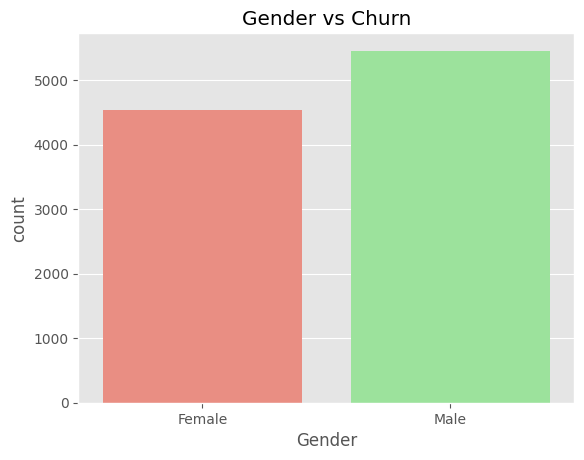

In [12]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

sns.countplot(data=df, x='Gender', hue='Gender', legend=False, palette=['salmon', 'lightgreen'])
plt.title("Gender vs Churn")
plt.show()

The data is also balanced looking at the customers gender, showing a small diference of 5457 male customers over 4543 female customers.

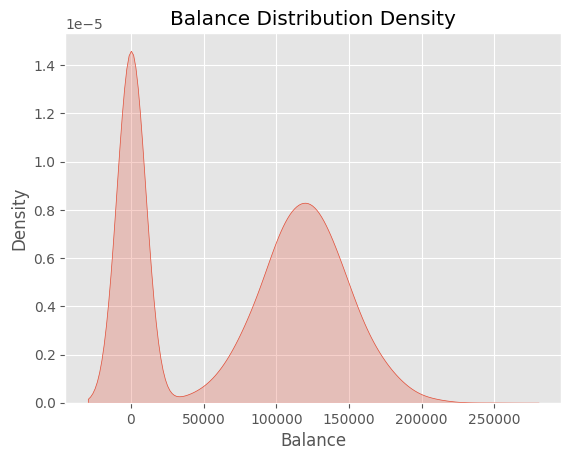

In [13]:
sns.kdeplot(data=df, x='Balance', fill=True)
plt.title("Balance Distribution Density")
plt.show()

The red curve represents the distribution of all clients, showing a broader range of balances with a peak near zero, and a smaller peak around 125.000.

Clients with a credit card (HasCrCard = 1): 7055
Clients without a credit card (HasCrCard = 0): 2945


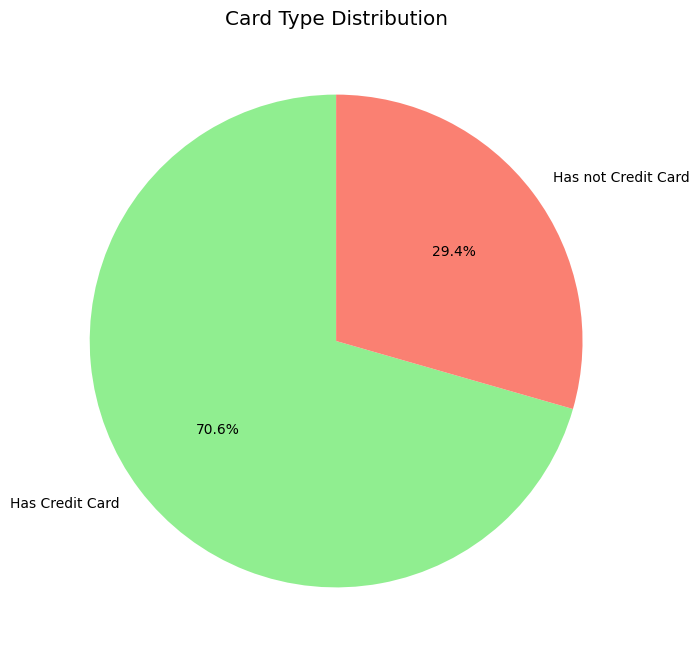

In [14]:
has_cr_card_counts = df['HasCrCard'].value_counts()
print(f"Clients with a credit card (HasCrCard = 1): {has_cr_card_counts[1]}")
print(f"Clients without a credit card (HasCrCard = 0): {has_cr_card_counts[0]}")

plt.figure(figsize=(8, 8))
plt.pie(has_cr_card_counts, labels=["Has Credit Card", "Has not Credit Card"], autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Card Type Distribution')
plt.show()
plt.show()

There appears to be a potential imbalance in the dataset between clients who have a credit card and those who do not. This imbalance might hinder the model's predictions if the group with fewer samples is underrepresented. This would be something to take into account later.

Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


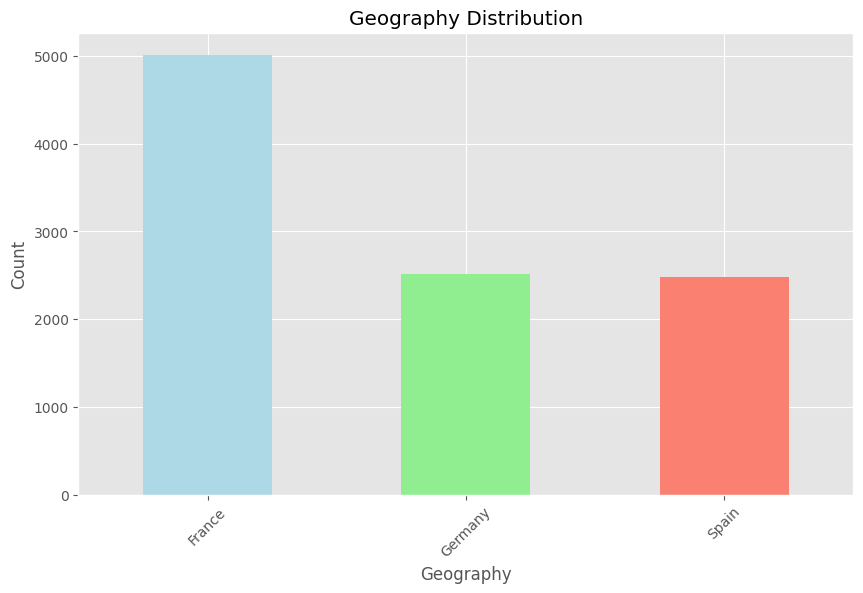

In [15]:
geography_counts = df['Geography'].value_counts()
print("Geography Distribution:\n",geography_counts)


geography_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Geography Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

We can see that France has the largest number of clients, while Germany and Spain have similar client counts. This also could mean that German and Spanish customers are undersampled in the dataset.

Card Type Distribution:
 Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


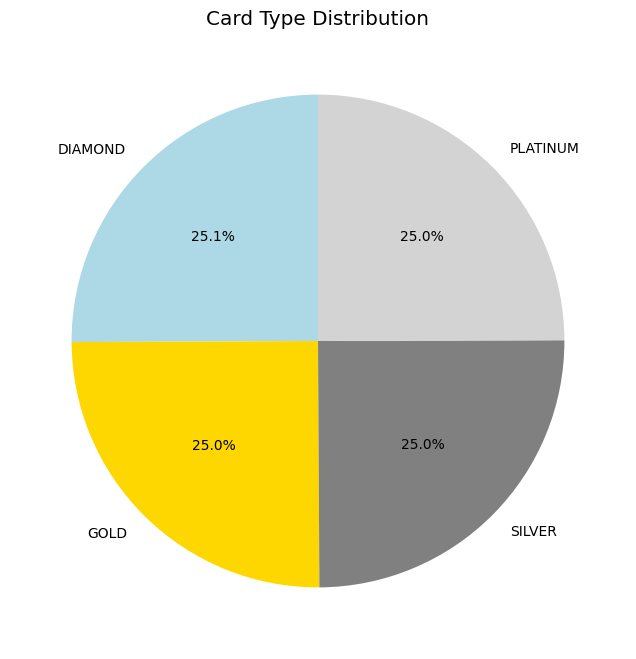

In [16]:
card_type_counts = df['Card Type'].value_counts()
print("Card Type Distribution:\n", card_type_counts)

plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'gold', 'grey', 'lightgrey'], startangle=90)
plt.title('Card Type Distribution')
plt.show()

Number of Products Distribution:
 NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


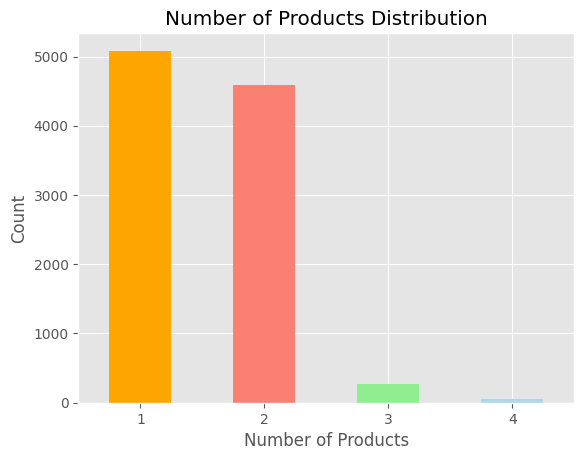

In [17]:
num_of_products_counts = df['NumOfProducts'].value_counts()
print("Number of Products Distribution:\n", num_of_products_counts)

num_of_products_counts.plot(kind='bar', stacked=True, color=['orange','salmon', 'lightgreen', 'lightblue'])
plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

The dataset reveals that the majority of clients have either 1 or 2 products, while very few have 3 or 4 products. This also indicates a significant imbalance in the NumOfProducts feature, with higher product categories being underrepresented. To manage this, we could consider grouping 3 and 4 into a single category or maybe doing just 2 categories (1 product / more than 1 product).

Satisfaction Distribution:
 Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


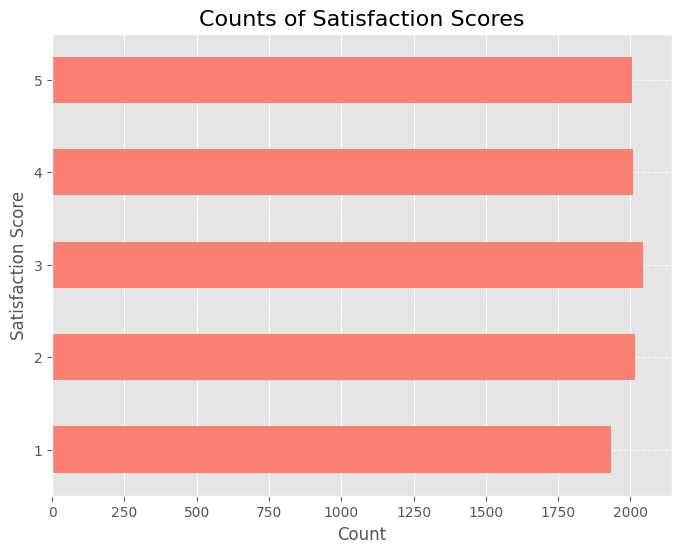

In [18]:
satisfaction_score_counts = df['Satisfaction Score'].value_counts()
print("Satisfaction Distribution:\n", satisfaction_score_counts)

plt.figure(figsize=(8, 6))
df['Satisfaction Score'].value_counts().sort_index().plot(kind='barh', color='salmon')
plt.title('Counts of Satisfaction Scores', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Satisfaction scores are balanced in the dataset, so it shouldnt disturb the modeling.

### Step 4: Feature Relationships
- Heatmap Correlation
- Pairplot
- Scatterplot
- Groupby comparisons

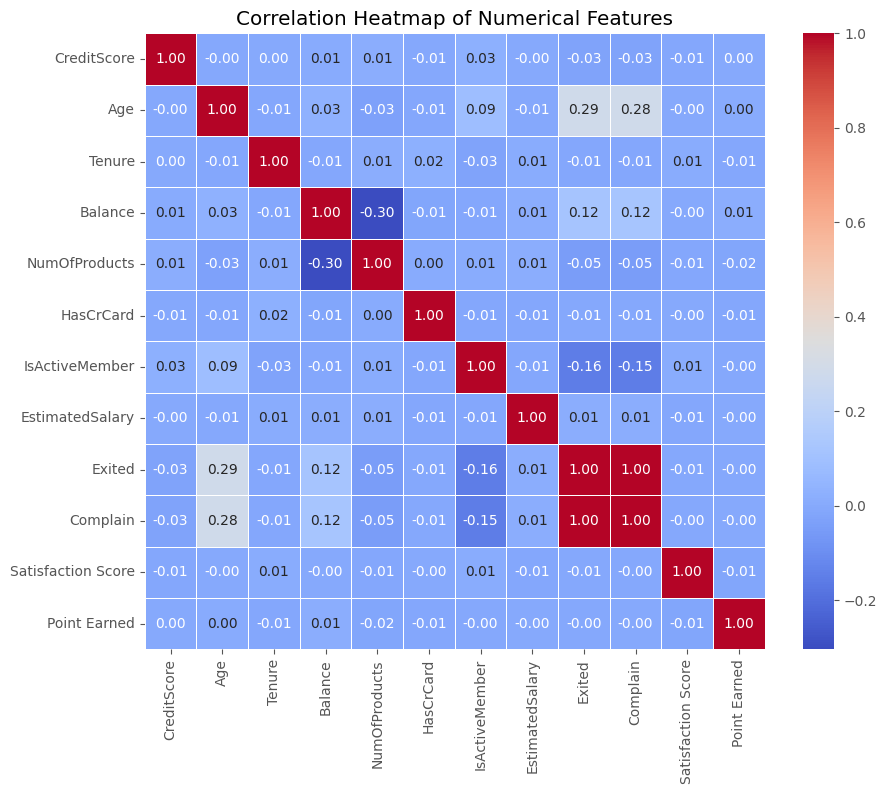

In [19]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

As we can se in this *Correlation Heatmap* not many features have big correlations between others. This are some of the most correlated features shown by the plot:
- Complain & Exit
- Number of Products & Balance
- Age & exit
- Is Active Member & Exit
- Balance & Exit

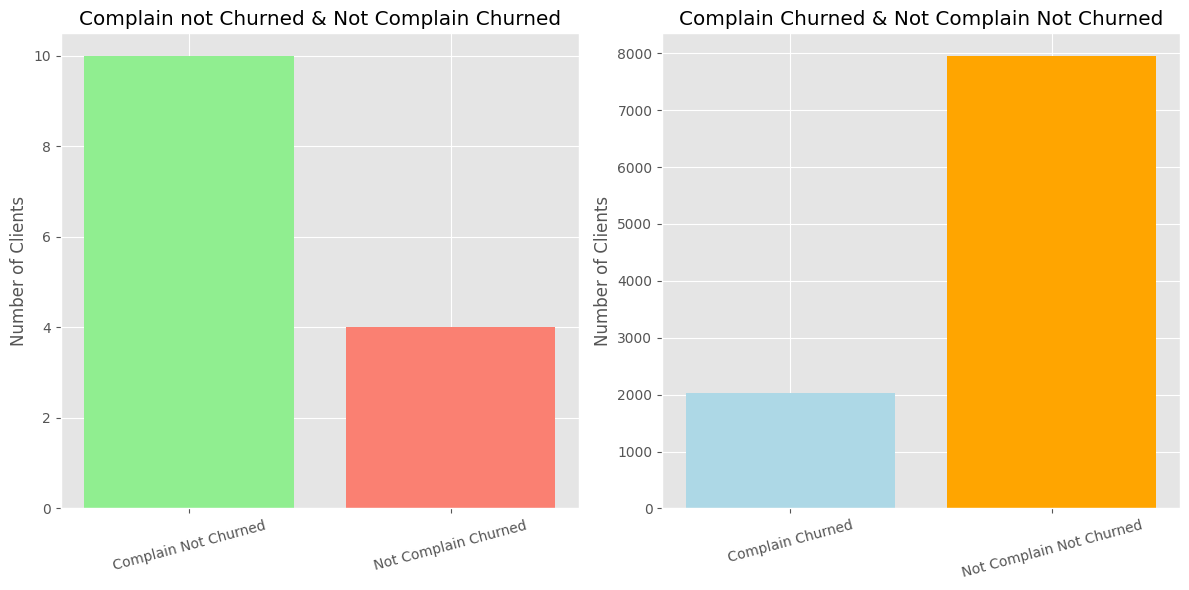

In [20]:
complain_not_churned = df[(df['Complain'] == 1) & (df['Exited'] == 0)]
complain_not_churned_count = complain_not_churned.shape[0]

not_complain_churned = df[(df['Complain'] == 0) & (df['Exited'] == 1)]
not_complain_churned_count = not_complain_churned.shape[0]

complain_churned = df[(df['Complain'] == 1) & (df['Exited'] == 1)]
complain_churned_count = complain_churned.shape[0]

not_complain_not_churned = df[(df['Complain'] == 0) & (df['Exited'] == 0)]
not_complain_not_churned_count = not_complain_not_churned.shape[0]



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(['Complain Not Churned', 'Not Complain Churned'], 
            [complain_not_churned_count, not_complain_churned_count], 
            color=['lightgreen', 'salmon'])
axes[0].set_title("Complain not Churned & Not Complain Churned")
axes[0].set_ylabel("Number of Clients")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Complain Not Churned', 'Not Complain Churned'], rotation=15)

axes[1].bar(['Complain Churned', 'Not Complain Not Churned'], 
            [complain_churned_count, not_complain_not_churned_count], 
            color=['lightblue', 'orange'])
axes[1].set_title("Complain Churned & Not Complain Not Churned")
axes[1].set_ylabel("Number of Clients")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Complain Churned', 'Not Complain Not Churned'], rotation=15)

plt.tight_layout()
plt.show()

As the previous correlation heatmap shows, the exit and complain features have a 100% correlation. Just 10 people complained and not churned and 4 people did not complain when they churned. This could lead to some potential issues, such as high predictive power of features. If complaints strongly correlate with churn, it might dominate predictions in a machine learning model, leading to biased outcomes. On other side, if complaints almost always lead to churn, it may highlight weaknesses in the bank’s issue resolution process. Addressing complaints promptly and effectively could improve retention.

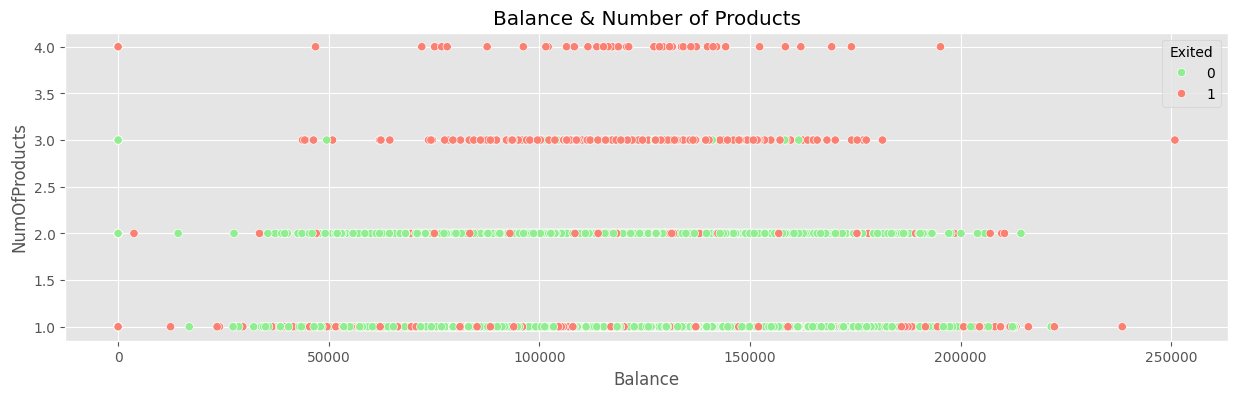

In [21]:
plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df,
    x='Balance',
    y='NumOfProducts',
    hue='Exited',
    palette=['lightgreen', 'salmon'],
)
plt.title('Balance & Number of Products')
plt.show()

In this scatterplot we can see how clients with 3 or more products have a high tendency of churning. In the feature understanding we saw how just 324 clients have 3 or more products, and we said that we might get together every client with 2 or more products.

In [22]:
aid_df = df[['Balance', 'NumOfProducts', 'Exited']].copy()
aid_df['NumOfProducts'] = aid_df['NumOfProducts'].apply(lambda x: '2+' if x >= 2 else str(x))

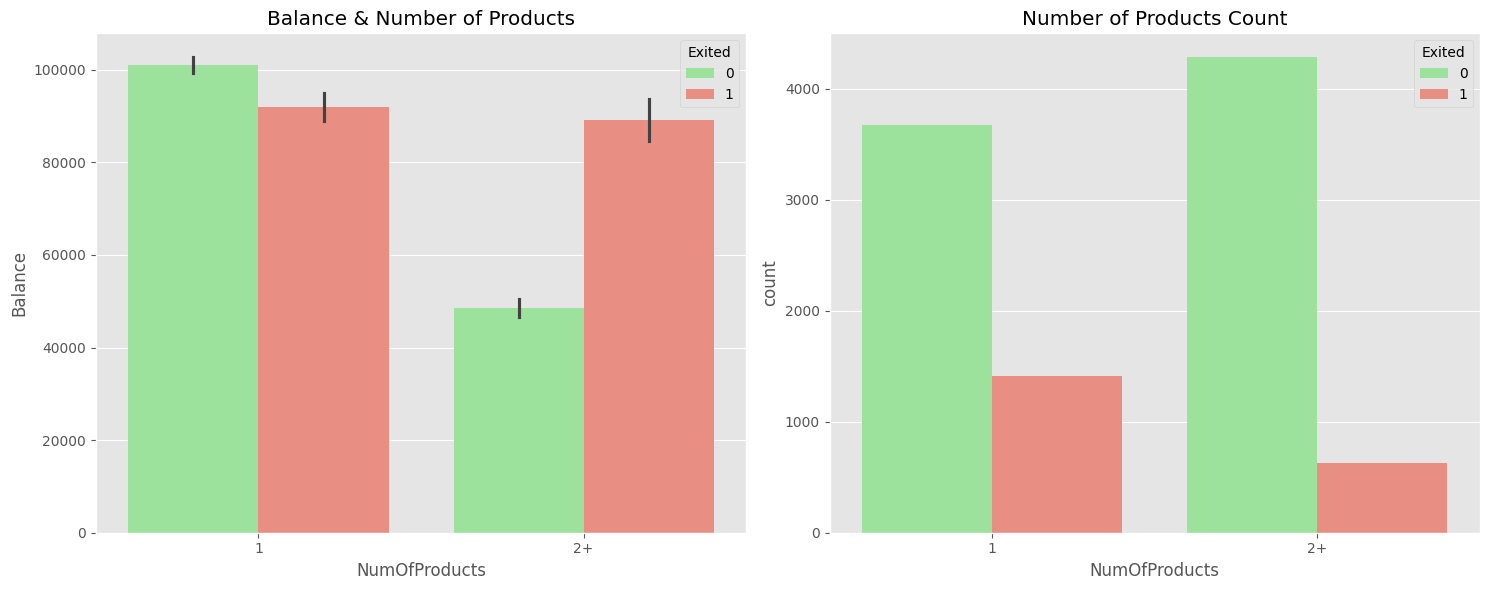

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=aid_df, x='NumOfProducts', y='Balance', hue='Exited', palette=['lightgreen', 'salmon'], ax=axes[0])
axes[0].set_title("Balance & Number of Products")

sns.countplot(data=aid_df, x='NumOfProducts', hue='Exited', palette=['lightgreen', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Products Count")

plt.tight_layout()
plt.show()

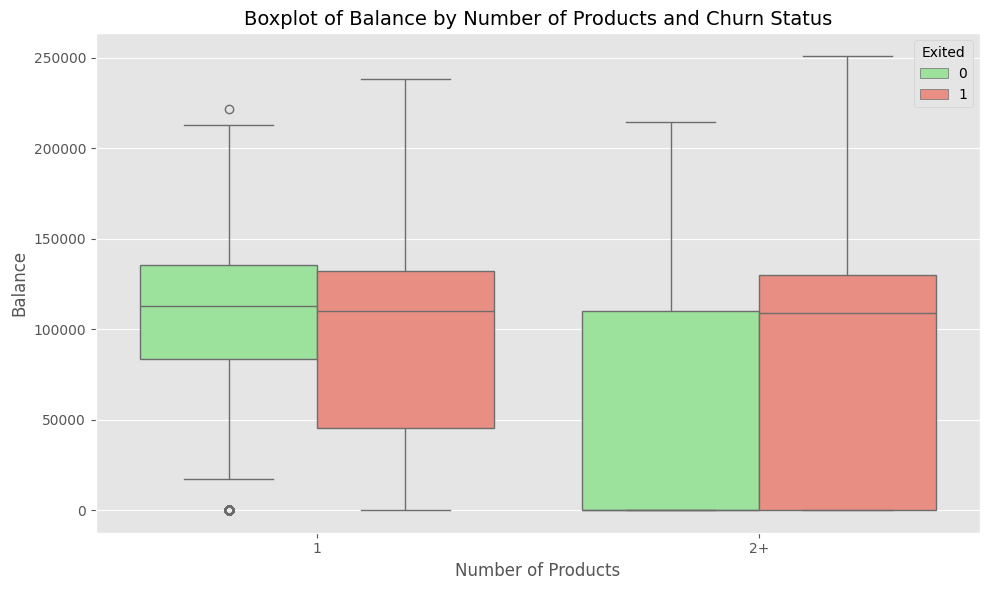

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aid_df, x='NumOfProducts', y='Balance', hue='Exited', palette=['lightgreen', 'salmon'])

plt.title("Boxplot of Balance by Number of Products and Churn Status", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.legend(title='Exited')

plt.tight_layout()
plt.show()

Customers with 2+ products tend to have higher balances on average, and a many of these customers churn. This suggests that while having more products may increase a customer's financial engagement with the bank, it also correlates with a higher risk of them leaving.

Customers with only 1 product generally have lower balances, but a relatively higher proportion of these customers also churn. This indicates that having just one product may also contribute to a higher risk of churn.

The majority of customers own 2 or more products, and they exhibit a relatively stable balance. This suggests that while churn is present, it does not dominate the behavior of the majority of customers with multiple products.

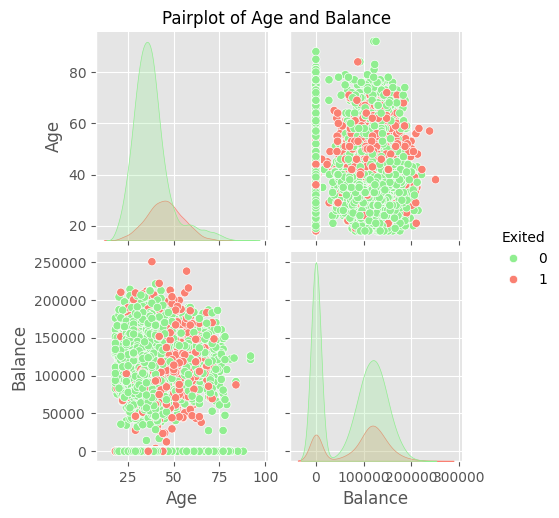

In [25]:
sns.pairplot(df, vars=['Age', 'Balance'], hue='Exited', palette=['lightgreen', 'salmon'])
plt.suptitle('Pairplot of Age and Balance', y=1.02)
plt.show()

The pairplot shows the relationships between Age and Balance, with each point colored based on whether the customer churned or not. Many conclusion can be taken from this plot:

Churned clients are more concentrated in the middle age range (around 30-60 years old).

The churn rate closely follows the distribution of clients in balance range.

Churned clients with low balances are concentrated in the younger age groups, while in the 40-60 age range, churned clients have slightly higher balances (5,000-20,000).

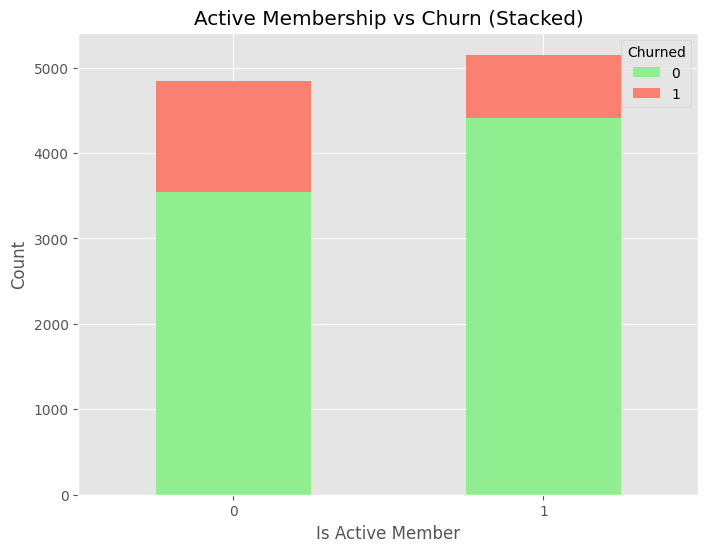

In [26]:
grouped_data = df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

grouped_data.plot(
    kind='bar', 
    stacked=True, 
    color=['lightgreen', 'salmon'], 
    figsize=(8, 6)
)

plt.title("Active Membership vs Churn (Stacked)")
plt.xlabel("Is Active Member")
plt.ylabel("Count")
plt.legend(title="Churned")
plt.xticks(rotation=0)
plt.show()

Non-active members show a slightly higher tendency to churn, as seen by their relatively larger proportion of exited clients compared to active members. This could indicate that engagement plays a role in customer retention.

# Feature Engineering

In this section, we will apply some feature engineering techniques to improve the dataset's usability and try to improve the model's performance. By transforming variables, such as creating categories or simplifying values, we aim to enhance interpretability, address imbalances, and potentially improve our predictive power. These changes may influence the model's outcomes, making this process a crucial step in the analysis. In this stage we will be applying the following techniques:

- Data Cleaning
- Feature Transformation
- Feature Encoding
- Feature Scaling

## Data Cleaning

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv(r'src/rawDataset.csv')
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [7]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

No duplicated rows found in the dataset.


**RESULT:**

As shown, our dataset seems to be complete and reliable. There are no missing values, ensuring every column is fully populated, and there are no duplicate records, which maintains the accuracy of our analysis. 

## FEATURE TRANSFORMATION

We have decided to transform the Age column into a categorical variable because its distribution does not appear to be normal. This could be due to the presence of outliers, which can significantly affect the distribution's shape and make it look skewed. By categorizing the Age column (Like this: <30, '30-40', '40-50', '50-60', '>60'), we can mitigate the influence of these outliers and make the data more suitable for modeling.

In [8]:
dfFeature= df

bins = [0, 30, 40, 50, 60, 100]  
labels = ['<30', '30-40', '40-50', '50-60', '>60']

dfFeature['Age'] = pd.cut(dfFeature['Age'], bins=bins, labels=labels, right=False)
dfFeature.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,40-50,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,40-50,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,40-50,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,30-40,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,40-50,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**EXPLANATION:**

We have also decided to transform NumOfProducts column as it only has 4.3% of the values corresponding to a value higher than 2. Simplifying it to a binary variable (Like this: "more than one product: yes/no") could improve interpretability and address potential class imbalance, making the data more manageable for analysis.

In [9]:
dfFeature['NumOfProducts'] = np.where(dfFeature['NumOfProducts'] > 1, 1, 0)
dfFeature.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,40-50,2,0.00,0,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,40-50,1,83807.86,0,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,40-50,8,159660.80,1,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,30-40,1,0.00,1,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,40-50,2,125510.82,0,1,1,79084.10,0,0,5,GOLD,425


## FEATURE ENCODING

Now we will split our categorical columns including the new Age column. We will be using OneHotEncoder for having the categorical columns as separate binary columns.

In [10]:
encoder = OneHotEncoder(sparse_output=False, dtype=int)
catcols = ['Gender','Geography', 'Card Type', 'Age']
encData = encoder.fit_transform(dfFeature[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
dfFeature = pd.concat([dfFeature.drop(columns= catcols),encDF],axis=1)

dfFeature.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age_30-40,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,2,0.00,0,1,1,101348.88,1,1,2,464,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,608,1,83807.86,0,0,1,112542.58,0,1,3,456,1,0,0,0,1,1,0,0,0,0,1,0,0,0
2,502,8,159660.80,1,1,0,113931.57,1,1,3,377,1,0,1,0,0,1,0,0,0,0,1,0,0,0
3,699,1,0.00,1,0,0,93826.63,0,0,5,350,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,850,2,125510.82,0,1,1,79084.10,0,0,5,425,1,0,0,0,1,0,1,0,0,0,1,0,0,0


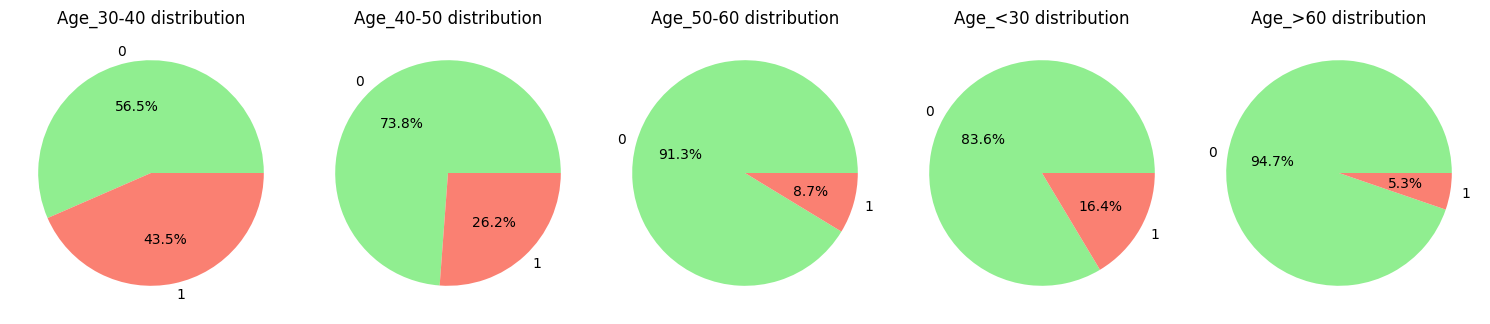

In [11]:
ageCols = dfFeature.filter(like='Age', axis=1)
plt.figure(figsize=(15, 10))  
for i, column in enumerate(ageCols, 1):
    plt.subplot(2, 5, i)  
    dfFeature[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
    plt.title(f'{column} distribution')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

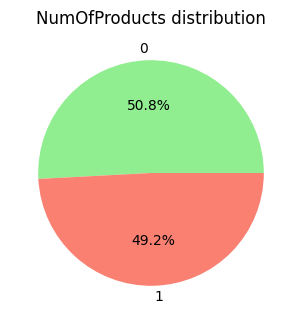

In [12]:
column = 'NumOfProducts'
plt.figure(figsize=(15, 10))
plt.subplot(2, 5, i)  
dfFeature[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title(f'{column} distribution')
plt.ylabel('') 
plt.tight_layout()
plt.show()

We can observe how now we only have binary values, which might help our model to make better predictions as having columns with that small categories that could harm the performance.

## FEATURE SELECTION

Previous Explanation:

For feature selection we have been researching on different methods, we have chosen 2: filther method, Wrapped method. Our purpose for each of then is to find which selects the best features for our models, a brief explanation about each of them could be:

- Filther Methods: Are statistical feature selection techniques to find more relevant features on a dataset without using any prediction model, depending on the input variables we are applying:

    -   Chi-square: This method is used to determine the independence of two categorical variables. Then its ideal in our case for columns like: Gender, Geography,...

    -   Anova test: As it uses means from numeric features between categorical groups defined by the target variable. Its ideal for example for Balance and Credit Score columns

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif

In [36]:
numerical_cols = [
    'CreditScore', 'Tenure', 'Balance',
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]
categorical_cols = [
    'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Complain', 'Gender_Female', 'Gender_Male',
    'Geography_France', 'Geography_Germany', 'Geography_Spain',
    'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
    'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_<30', 'Age_>60', 'Exited'
]
dfFeature[categorical_cols] = dfFeature[categorical_cols].astype('category')
dfFeature[numerical_cols] = dfFeature[numerical_cols].apply(pd.to_numeric)
print(dfFeature.dtypes)

CreditScore              int64
Tenure                   int64
Balance                float64
NumOfProducts         category
HasCrCard             category
IsActiveMember        category
EstimatedSalary        float64
Exited                category
Complain              category
Satisfaction Score       int64
Point Earned             int64
Gender_Female         category
Gender_Male           category
Geography_France      category
Geography_Germany     category
Geography_Spain       category
Card Type_DIAMOND     category
Card Type_GOLD        category
Card Type_PLATINUM    category
Card Type_SILVER      category
Age_30-40             category
Age_40-50             category
Age_50-60             category
Age_<30               category
Age_>60               category
dtype: object


## CHI-SQUARE

In [37]:
dfFeature['Exited'] = dfFeature['Exited'].astype('category')
cats = dfFeature.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

if not cats.empty:
        chi2Score, chi2Val = chi2(dfFeature[cats], le.fit_transform(dfFeature['Exited']))
        chi2Results = pd.DataFrame({'Feature': dfFeature[cats].columns, 'Chi2 Score': chi2Score, 'p-Value': chi2Val})
        chi2Sel = chi2Results[chi2Results['p-Value'] < 0.05]
        print("Características categóricas seleccionadas:")
        print(chi2Sel)

Características categóricas seleccionadas:
              Feature   Chi2 Score        p-Value
0       NumOfProducts   174.301778   8.505154e-40
2      IsActiveMember   118.543911   1.318038e-27
3              Exited  7962.000000   0.000000e+00
4            Complain  7887.606705   0.000000e+00
5       Gender_Female    61.623587   4.158076e-15
6         Gender_Male    51.302173   7.918794e-13
7    Geography_France    54.644909   1.443979e-13
8   Geography_Germany   225.008895   7.309210e-51
9     Geography_Spain    20.972597   4.658998e-06
14          Age_30-40   241.537191   1.817748e-54
15          Age_40-50   176.021186   3.582693e-40
16          Age_50-60   681.068598  3.913292e-150
17            Age_<30   166.304621   4.745970e-38
18            Age_>60    18.560097   1.646309e-05


**Results:**

Chi-square test revealed several significant categorical features that are strongly related to the target variable Exited(wheter a customer left the bank). Features like NumOfProducts, IsActiveMember, Complain, and demographics such as Gender and Geography show strong relationships with the likelihood of customer churn. All features have p-values below 0.05, indicating statistical significance.

## ANNOVA TEST

In [38]:
nums = dfFeature.select_dtypes(include=['float64', 'int64']).columns

if not nums.empty:
        annScore, annPVal = f_classif(dfFeature[nums], le.fit_transform(dfFeature['Exited']))
        annResults = pd.DataFrame({'Feature': nums, 'F-Score': annScore, 'p-Value': annPVal})
        annSel = annResults[annResults['p-Value'] < 0.05]
        print(annSel)

       Feature     F-Score       p-Value
0  CreditScore    7.170810  7.422037e-03
2      Balance  142.581456  1.209208e-32


**Results:**

The results we obtained from the ANNOVA test evaluate the relationship between numeric features and the target variable Exited. We stablished a minimum p-value < 0.05 because we wanted to check which features influenced more the target variable results.

In the results, Balance and CreditScore have p-values of 1.2e-32 and 0.0074, respectively, indicating strong evidence that these features affect customer exit. We only have those features as p-value < 0.05 rejects the null hypothesis, confirming the feature’s relevance.

In [39]:
selectedFeatures = list(annSel['Feature'])+list(chi2Sel['Feature']) 
print(selectedFeatures)

dfFSel = dfFeature[selectedFeatures]
dfFSel.head()

['CreditScore', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Exited', 'Complain', 'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_<30', 'Age_>60']


,CreditScore,Balance,NumOfProducts,IsActiveMember,Exited,Complain,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Age_30-40,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,0.00,0,1,1,1,1,0,1,0,0,0,1,0,0,0
1,608,83807.86,0,1,0,1,1,0,0,0,1,0,1,0,0,0
2,502,159660.80,1,0,1,1,1,0,1,0,0,0,1,0,0,0
3,699,0.00,1,0,0,0,1,0,1,0,0,1,0,0,0,0
4,850,125510.82,0,1,0,0,1,0,0,0,1,0,1,0,0,0


# Classification

After selecting the most important features by feature selection we are going to begin with classification. We will be training our models for which **EXITED**  is going to be our target as our main task is to predict if a client wil leave or not a Bank. We will be using the following algorithms:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)
- CART

As out dataset is umbalanced, we are expecting to have low values in some of our metrics due to our imbalanced dataset. We are going to be applying class_weight='balanced' parameter to our models to have more fiable results as the model will be penalized more for misclassifying the minority class, like that we could adjust the model to the data.

We are using 5 metrics to evaluate our models: **accuracy, precision, recall, f1, roc-auc**. As each of them can tell us important information about our models. As for example:

- Accuracy gives us the overall percentage of correct predictions, but it may not be reliable in imbalanced datasets, as it can be high even if the model fails to identify minority class cases (e.g., churn).

- Precision helps us understand how many of the predicted "churn" cases are actually correct. It’s crucial when the cost of false positives (e.g., offering incentives to non-churning customers) is high.

- Recall shows us how many actual "churn" cases were correctly identified. It’s important when the goal is to identify as many churners as possible, even if that means some non-churners are incorrectly labeled.

- F1-Score balances both precision and recall, providing a single metric that helps us evaluate the trade-off between the two, especially when dealing with imbalanced classes.

- ROC-AUC measures the model's ability to distinguish between churners and non-churners. It provides insight into the model's overall discriminatory power, regardless of threshold, and is especially useful when we care about both true positive and false positive rates.

Each of these metrics gives us a different perspective on how well our model is performing and could be interesting in our project perspective as maybe we will be having clients that seem to be churning but finally no, and contrary.

In [57]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

## Logistic Regression

In [58]:
X = dfFeature.drop(['Exited','Complain'], axis=1)
y = dfFeature['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

The hyperparameters that are going to be tunned are:

- Solver: Different solvers (lbfgs, liblinear, saga, sag) to account for varying dataset sizes and characteristics, ensuring flexibility in optimization.
- C (Inverse of Regularization Strength): A logarithmic scale (1e-6 to 1e2) to explore a wide range, allowing the model to generalize well without overfitting or underfitting.
- max_iter: The iteration range (100 to 5000) ensures the model converges even for complex datasets, preventing early stopping.


We are going to apply Stratified K-Fold Cross-Validation to handle class imbalance, ensuring fair performance evaluation. Our goal metric is to maximize the ROC-AUC score, as we want to prioritize model discrimination ability for imbalanced classes.

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear", "saga","sag"])
    C = trial.suggest_float("C", 1e-6, 1e2, log =True)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    model = LogisticRegression(
        solver=solver,
        C=C,
        random_state=42,
        class_weight='balanced',
        max_iter= max_iter
    )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=500, n_jobs=-1)
print("Best hyperparameters:", study.best_params)

best_params = study.best_params
best_model = LogisticRegression(**best_params, class_weight='balanced', random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

[I 2024-12-22 14:46:28,378] A new study created in memory with name: no-name-056f9e27-7dfc-42f7-bcfc-73f880843d1a
[I 2024-12-22 14:46:32,021] Trial 0 finished with value: 0.7961288054627231 and parameters: {'solver': 'sag', 'C': 0.005852233215140441, 'max_iter': 493}. Best is trial 0 with value: 0.7961288054627231.
[I 2024-12-22 14:46:32,152] Trial 6 finished with value: 0.7886103379530198 and parameters: {'solver': 'sag', 'C': 6.602587945512787e-06, 'max_iter': 780}. Best is trial 0 with value: 0.7961288054627231.
[I 2024-12-22 14:46:32,168] Trial 5 finished with value: 0.7884547967370052 and parameters: {'solver': 'lbfgs', 'C': 2.9071143369014387e-06, 'max_iter': 169}. Best is trial 0 with value: 0.7961288054627231.
[I 2024-12-22 14:46:32,187] Trial 2 finished with value: 0.7943769201876126 and parameters: {'solver': 'sag', 'C': 0.00043508381053610986, 'max_iter': 967}. Best is trial 0 with value: 0.7961288054627231.
[I 2024-12-22 14:46:32,204] Trial 3 finished with value: 0.79610472

Best hyperparameters: {'solver': 'saga', 'C': 0.045270171129065444, 'max_iter': 258}


### MODEL EVALUATION

Accuracy: 0.7350
Precision: 0.4141
Recall: 0.7206
F1 Score: 0.5259
ROC AUC Score: 0.8107
Error Rate: 0.2650


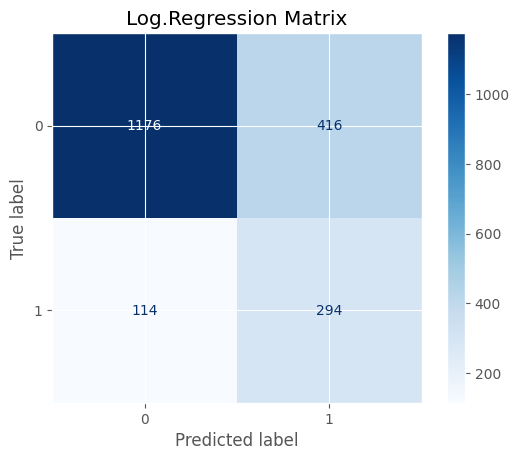

In [60]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Log.Regression Matrix")
plt.show()

**Model Evaluation Summary:**

Our logistic regression model shows better recall than precision(as we have 438 false positives which shows a clear imbalance), indicating a focus on minimizing false negatives. It is what we are interested in as it is critical in our scenario,  where assuming that someone is not leaving and ended un leaving could carry higher costs.

We obtained a pretty solid ROC-AUC which means that our model is robust in distinguishing classes.

## RANDOMFOREST

For our Random Forest model, we are using Optuna for hyperparameter tuning, evaluating the following hyperparameters:

- n_estimators: The number of trees (100 to 1000) to balance model complexity and performance, ensuring sufficient trees to reduce variance without overfitting.
- max_depth: Tree depth (3 to 50) to control model complexity and prevent overfitting by limiting how deep each tree can grow.
- min_samples_split: Minimum samples required to split a node (2 to 32), preventing the model from creating overly complex trees.
- min_samples_leaf: Minimum samples at a leaf node (1 to 32), controlling the smallest size of terminal nodes to ensure the model generalizes well.
- max_features: Number of features to consider at each split (sqrt, log2, or all), providing flexibility in feature selection and improving model robustness.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight="balanced", 
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

best_params =study.best_params
best_model = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

[I 2024-12-22 13:46:05,322] A new study created in memory with name: no-name-629b9b6f-0c02-4b2f-85e7-1bb05e860d4c
[I 2024-12-22 13:46:06,604] Trial 0 finished with value: 0.8092019724359776 and parameters: {'n_estimators': 129, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.8092019724359776.
[I 2024-12-22 13:46:09,662] Trial 5 finished with value: 0.8118919205246989 and parameters: {'n_estimators': 362, 'max_depth': 38, 'min_samples_split': 2, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.8118919205246989.
[I 2024-12-22 13:46:10,308] Trial 2 finished with value: 0.8132773449162581 and parameters: {'n_estimators': 262, 'max_depth': 29, 'min_samples_split': 31, 'min_samples_leaf': 30, 'max_features': None}. Best is trial 2 with value: 0.8132773449162581.
[I 2024-12-22 13:46:15,834] Trial 1 finished with value: 0.811876510868623 and parameters: {'n_estimators': 408, 'max_depth': 39, 'm

Best hyperparameters: {'n_estimators': 375, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': None}


### MODEL EVALUATION

Accuracy: 0.7665
Precision: 0.4526
Recall: 0.6912
F1 Score: 0.5470
ROC AUC Score: 0.8251
Error Rate: 0.2335


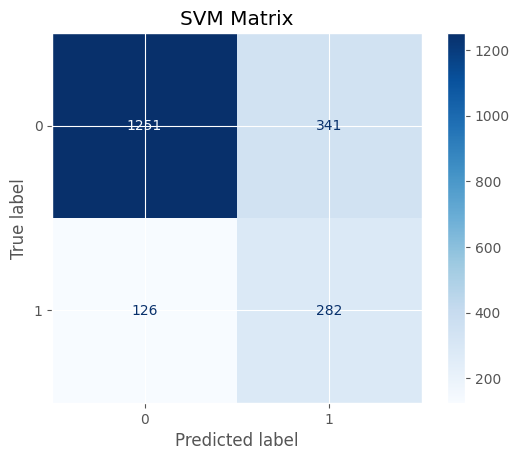

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("SVM Matrix")
plt.show()

For the Random Forest model, we observe similar trends as in logistic regression, with a slightly lower recall of 0.6863 and precision of 0.4459. However, compared to other model, we have seen an improvement in the number of true negatives (TN), which have increased by 100, and a reduction in false positives (FP). This improvement suggests that the model is becoming more conservative in predicting churners, thereby reducing the number of incorrect predictions.

The F1 score of 0.5405 reflects a reasonable balance between precision and recall, while the ROC AUC score of 0.8252 confirms that the model continues to perform well in distinguishing between churners and non-churners. Overall, the Random Forest model has shown some positive adjustments in its classification performance, particularly in reducing false positives while maintaining strong recall.

## SUPPORT VECTOR MACHINES (SVM)

For our Support Vector Classifier (SVC) model, we are using Optuna for hyperparameter tuning. The following hyperparameters are being evaluated:

- C: Regularization parameter (ranging from 1e-3 to 1e2).

- kernel: Specifies the type of kernel function used linear kernel. Because it is generally speaking the simpler, more efficienct, and has the strongest performance with linearly separable data.

- gamma: Defines how much influence a single training example has. Choices are "scale" (1 / (n_features * X.var())) and "auto" (1 / n_features). Higher gamma = model will be more sensitive to the training data, leading to overfitting, Lower gamma = may underfit the model.


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    C = trial.suggest_float("C", 1e-3, 1e2, log=True)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    
    model = SVC(
        C=C,
        kernel="linear",
        gamma=gamma,
        probability=True,
        random_state=42,
        class_weight="balanced"
    )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

best_params = study.best_params
best_model = SVC(**best_params,class_weight='balanced', random_state=42 ,probability=True)

best_model.fit(X_train_scaled,y_train )

y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

[I 2024-12-22 16:27:03,505] A new study created in memory with name: no-name-84a0caca-c470-449b-8d53-68d2bd30d871
[I 2024-12-22 16:27:17,727] Trial 0 finished with value: 0.7845956409935375 and parameters: {'C': 0.08582399733792853, 'gamma': 'auto'}. Best is trial 0 with value: 0.7845956409935375.
[I 2024-12-22 16:27:29,826] Trial 7 finished with value: 0.7843206749429361 and parameters: {'C': 0.524569162822886, 'gamma': 'scale'}. Best is trial 0 with value: 0.7845956409935375.
[I 2024-12-22 16:27:36,386] Trial 1 finished with value: 0.783697065423621 and parameters: {'C': 0.10281374074388493, 'gamma': 'auto'}. Best is trial 0 with value: 0.7845956409935375.
[I 2024-12-22 16:27:55,843] Trial 4 finished with value: 0.786432760928817 and parameters: {'C': 0.39261418310346863, 'gamma': 'scale'}. Best is trial 4 with value: 0.786432760928817.
[I 2024-12-22 16:28:24,558] Trial 9 finished with value: 0.784941395151737 and parameters: {'C': 0.00561192006190055, 'gamma': 'auto'}. Best is trial

### MODEL EVALUATION

Accuracy: 0.7705
Precision: 0.4511
Recall: 0.5760
F1 Score: 0.5059
ROC AUC Score: 0.7858
Error Rate: 0.2295


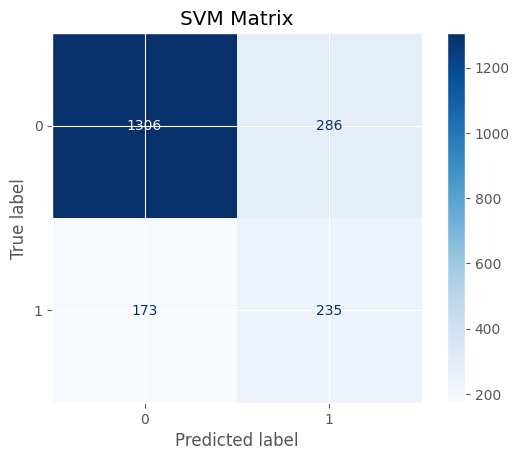

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("SVM Matrix")
plt.show()

## NAIVE BAYES

In [49]:
scaler = StandardScaler()
xStandard = scaler.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(xStandard, y, test_size = 0.2, random_state = 0)
model = GaussianNB()

model.fit(X_train, y_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.7925
Precision: 0.4890
Recall: 0.5481
F1 Score: 0.5169
ROC AUC Score: 0.7852
Error Rate: 0.2075


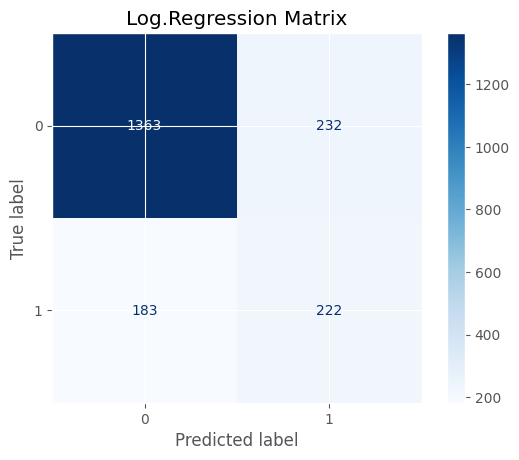

In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Log.Regression Matrix")
plt.show()

## CART

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 3, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight="balanced", 
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=500, n_jobs=-1)

print("Best hyperparameters:", study.best_params)
best_params = study.best_params

[I 2024-12-22 16:26:16,606] A new study created in memory with name: no-name-ffd80554-6e8b-47d5-b45f-af020c1d3004
[I 2024-12-22 16:26:16,804] Trial 2 finished with value: 0.7449270930646916 and parameters: {'max_depth': 45, 'min_samples_split': 24, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 2 with value: 0.7449270930646916.
[I 2024-12-22 16:26:16,862] Trial 13 finished with value: 0.7461302501179803 and parameters: {'max_depth': 19, 'min_samples_split': 25, 'min_samples_leaf': 28, 'max_features': 'log2'}. Best is trial 13 with value: 0.7461302501179803.
[I 2024-12-22 16:26:16,908] Trial 1 finished with value: 0.7400771445907292 and parameters: {'max_depth': 47, 'min_samples_split': 7, 'min_samples_leaf': 14, 'max_features': 'log2'}. Best is trial 13 with value: 0.7461302501179803.
[I 2024-12-22 16:26:16,959] Trial 5 finished with value: 0.7841547803642458 and parameters: {'max_depth': 6, 'min_samples_split': 28, 'min_samples_leaf': 7, 'max_features': None}. Best is 

Best hyperparameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 20, 'max_features': None}


In [72]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = DecisionTreeClassifier(**best_params, class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### MODEL EVALUATION

Accuracy: 0.7385
Precision: 0.4183
Recall: 0.7457
F1 Score: 0.5359
ROC AUC Score: 0.7996
Error Rate: 0.2615


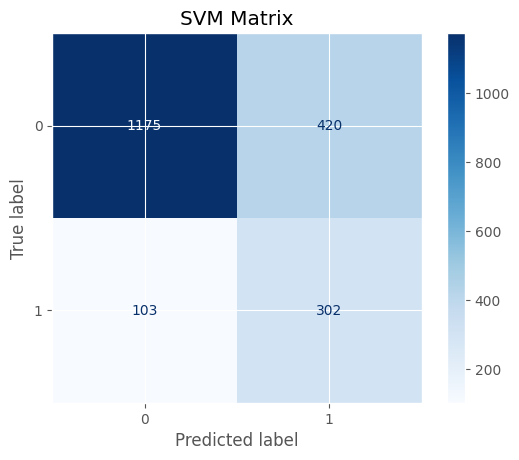

In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("SVM Matrix")
plt.show()

## CLASSIFICATION CONCLUSION

We have concluded that the Random Forest model stands out as the best solution for our study, as it gives us the most balanced results, on one hand it has better accuracy than the rest of the models, which give us a good idea of a client leaving or not the bank. But also it has a 68% recall which is the most important metric for us, as we want to be able to predict the clients that are at the highest risk of leaving. This high recall means the model successfully identifies most churners, minimizing false negatives, which is crucial for proactive retention strategies. Additionally, the model’s ROC-AUC score of 82.5% reflects strong discriminatory power, reinforcing its reliability in distinguishing between clients who stay and those who leave. Overall, the Random Forest model provides a solid balance between precision and recall, making it the most effective choice for mitigating churn and improving client retention efforts.

But we want to make a reflexion about Precision, as we were expecting to have some issues with the results of this metric and it happened as in all of our models the results tend to be really low. It can be primarily attributed to the class imbalance as we mentioned in the explanation at the beginning of this section. So what we expected to be solved with class_weight hyperparameter in our models didn't seem to be solved or at least that wasn't the issue. This bring us to think that our dataset is incoherent or lacks of important features that could help us to predict.

# REGRESSION

For this section we have decie

In [19]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import optuna

## LINEAR MODELS

- Linear Regression

In [24]:
X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 300)
    
    model = Ridge(alpha=alpha, random_state=42)
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)

best_params = study.best_params
best_model = Ridge(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {study.best_params}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

[I 2024-12-22 18:35:35,634] A new study created in memory with name: no-name-7c0781ed-b833-424f-bedc-65829fa395d9
C:\Users\dekum\AppData\Local\Temp\ipykernel_8756\3146907638.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 300)
C:\Users\dekum\AppData\Local\Temp\ipykernel_8756\3146907638.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 300)
C:\Users\dekum\AppData\Local\Temp\ipykernel_8756\3146907638.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

Best Hyperparameters: {'alpha': 127.32073394200816}
Mean Squared Error (MSE): 2791119746.049796
Mean Absolute Percentage Error (MAPE): 7.950516307367446e+19
Root Mean Squared Error (RMSE): 52831.049072016314
R-squared (R²): 0.2766741125014406


# RANSAC REGRESSION

In [ ]:
from sklearn.linear_model import RANSACRegressor, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Splitting data
X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Define RANSAC regressor with Ridge as the base estimator
ransac = RANSACRegressor(
    estimator=Ridge(alpha=1.0, random_state=42),
    random_state=42,
    min_samples=0.5  # Or an integer like `min_samples=50`
)
# Fit the RANSAC model
ransac.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ransac.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Inlier mask: {ransac.inlier_mask_}")


- RANSAC regression did not perform well in this case, shown by the high errors and the low R squared. The target variable likely has a complex relationship with the features that RANSAC couldn't capture effectively.

In [ ]:
from sklearn.linear_model import TheilSenRegressor

# Splitting data
X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Theil-Sen regressor
theil_sen = TheilSenRegressor(random_state=42)

# Fit the Theil-Sen model
theil_sen.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = theil_sen.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

- The model still fails to capture the underlying relationships effectively.
Extremelly high MAPE, and poor performance overall.